In [15]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict


# 1. Define State

In [16]:
class CricketState(TypedDict):
    runs: int 
    balls: int 
    fours: int
    sixes: int
    
    strike_rate: float
    hit_per_ball: float
    hit_run_percentage: float
    
    summary: str 

# 2. Define Nodes

In [17]:
def strike_rate_calculate(state: CricketState):
    strike_rate = (state['runs'] / state['balls']) * 100
    return {"strike_rate": strike_rate}

In [18]:
def hit_per_ball_calculate(state: CricketState):
    hit_per_ball = ((state['fours'] + state['sixes']) / state['balls'])
    return {"hit_per_ball": hit_per_ball}

In [19]:
def hit_run_percentage_calculate(state: CricketState):
    hit_run_percentage = ((state['fours'] * 4) + (state['sixes'] *6)) / state['runs']
    return {"hit_run_percentage": hit_run_percentage}

In [20]:
def summary(state: CricketState):
    summary = f'''Strike Rate - {state['strike_rate']} \n
        Hit(four or Sixes)  per Ball - {state['hit_per_ball']} \n
        Hit(four or Sixes) Run Percent - {state['hit_run_percentage']} \n
    '''    
    return {"summary": summary}

# 3. Graph Create

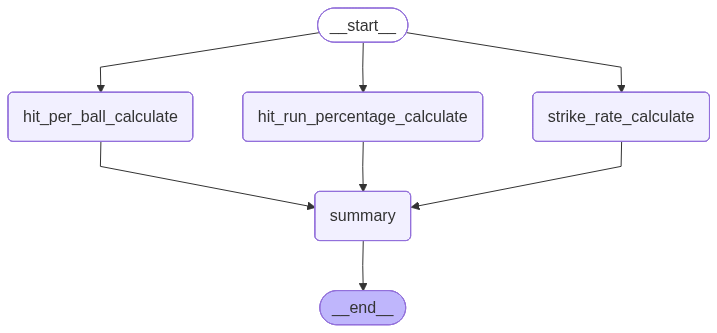

In [21]:
graph = StateGraph(CricketState)

graph.add_node('strike_rate_calculate',strike_rate_calculate)
graph.add_node('hit_per_ball_calculate',hit_per_ball_calculate)
graph.add_node('hit_run_percentage_calculate',hit_run_percentage_calculate)
graph.add_node('summary',summary)

graph.add_edge(START, 'strike_rate_calculate')
graph.add_edge(START, 'hit_per_ball_calculate')
graph.add_edge(START, 'hit_run_percentage_calculate')

graph.add_edge('strike_rate_calculate','summary')
graph.add_edge('hit_per_ball_calculate','summary')
graph.add_edge('hit_run_percentage_calculate','summary')

graph.add_edge('summary', END)

workflow = graph.compile()
workflow

In [22]:
initial_state = {
    'runs': 100,
    'balls': 50,
    'fours' : 6,
    'sixes' : 4
}
final_state = workflow.invoke(initial_state)
print(final_state)

{'runs': 100, 'balls': 50, 'fours': 6, 'sixes': 4, 'strike_rate': 200.0, 'hit_per_ball': 0.2, 'hit_run_percentage': 0.48, 'summary': 'Strike Rate - 200.0 \n\n        Hit(four or Sixes)  per Ball - 0.2 \n\n        Hit(four or Sixes) Run Percent - 0.48 \n\n    '}
